In [1]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.tail(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4218,0,52,1.0,0,0.0,0.0,0,0,0,265.0,137.5,84.5,26.91,72.0,86.0,0
4219,1,48,1.0,0,0.0,0.0,0,0,0,204.0,125.0,84.5,22.37,65.0,75.0,0
4220,1,60,1.0,0,0.0,0.0,0,0,0,252.0,128.0,82.0,21.18,75.0,70.0,1
4221,1,50,1.0,0,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0,1
4222,1,53,3.0,0,0.0,0.0,0,1,0,289.0,188.0,110.0,26.70,70.0,63.0,0
4223,1,56,4.0,0,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0,1
4224,1,47,2.0,1,3.0,0.0,0,0,0,198.0,120.0,80.0,25.23,75.0,76.0,0
4225,1,45,4.0,1,43.0,0.0,0,0,0,216.0,137.5,85.0,24.24,83.0,105.0,0
4226,1,58,1.0,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0,1
4227,1,43,4.0,1,20.0,0.0,0,0,0,187.0,129.5,88.0,25.62,80.0,75.0,0


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c792860>,
      dtype=object)

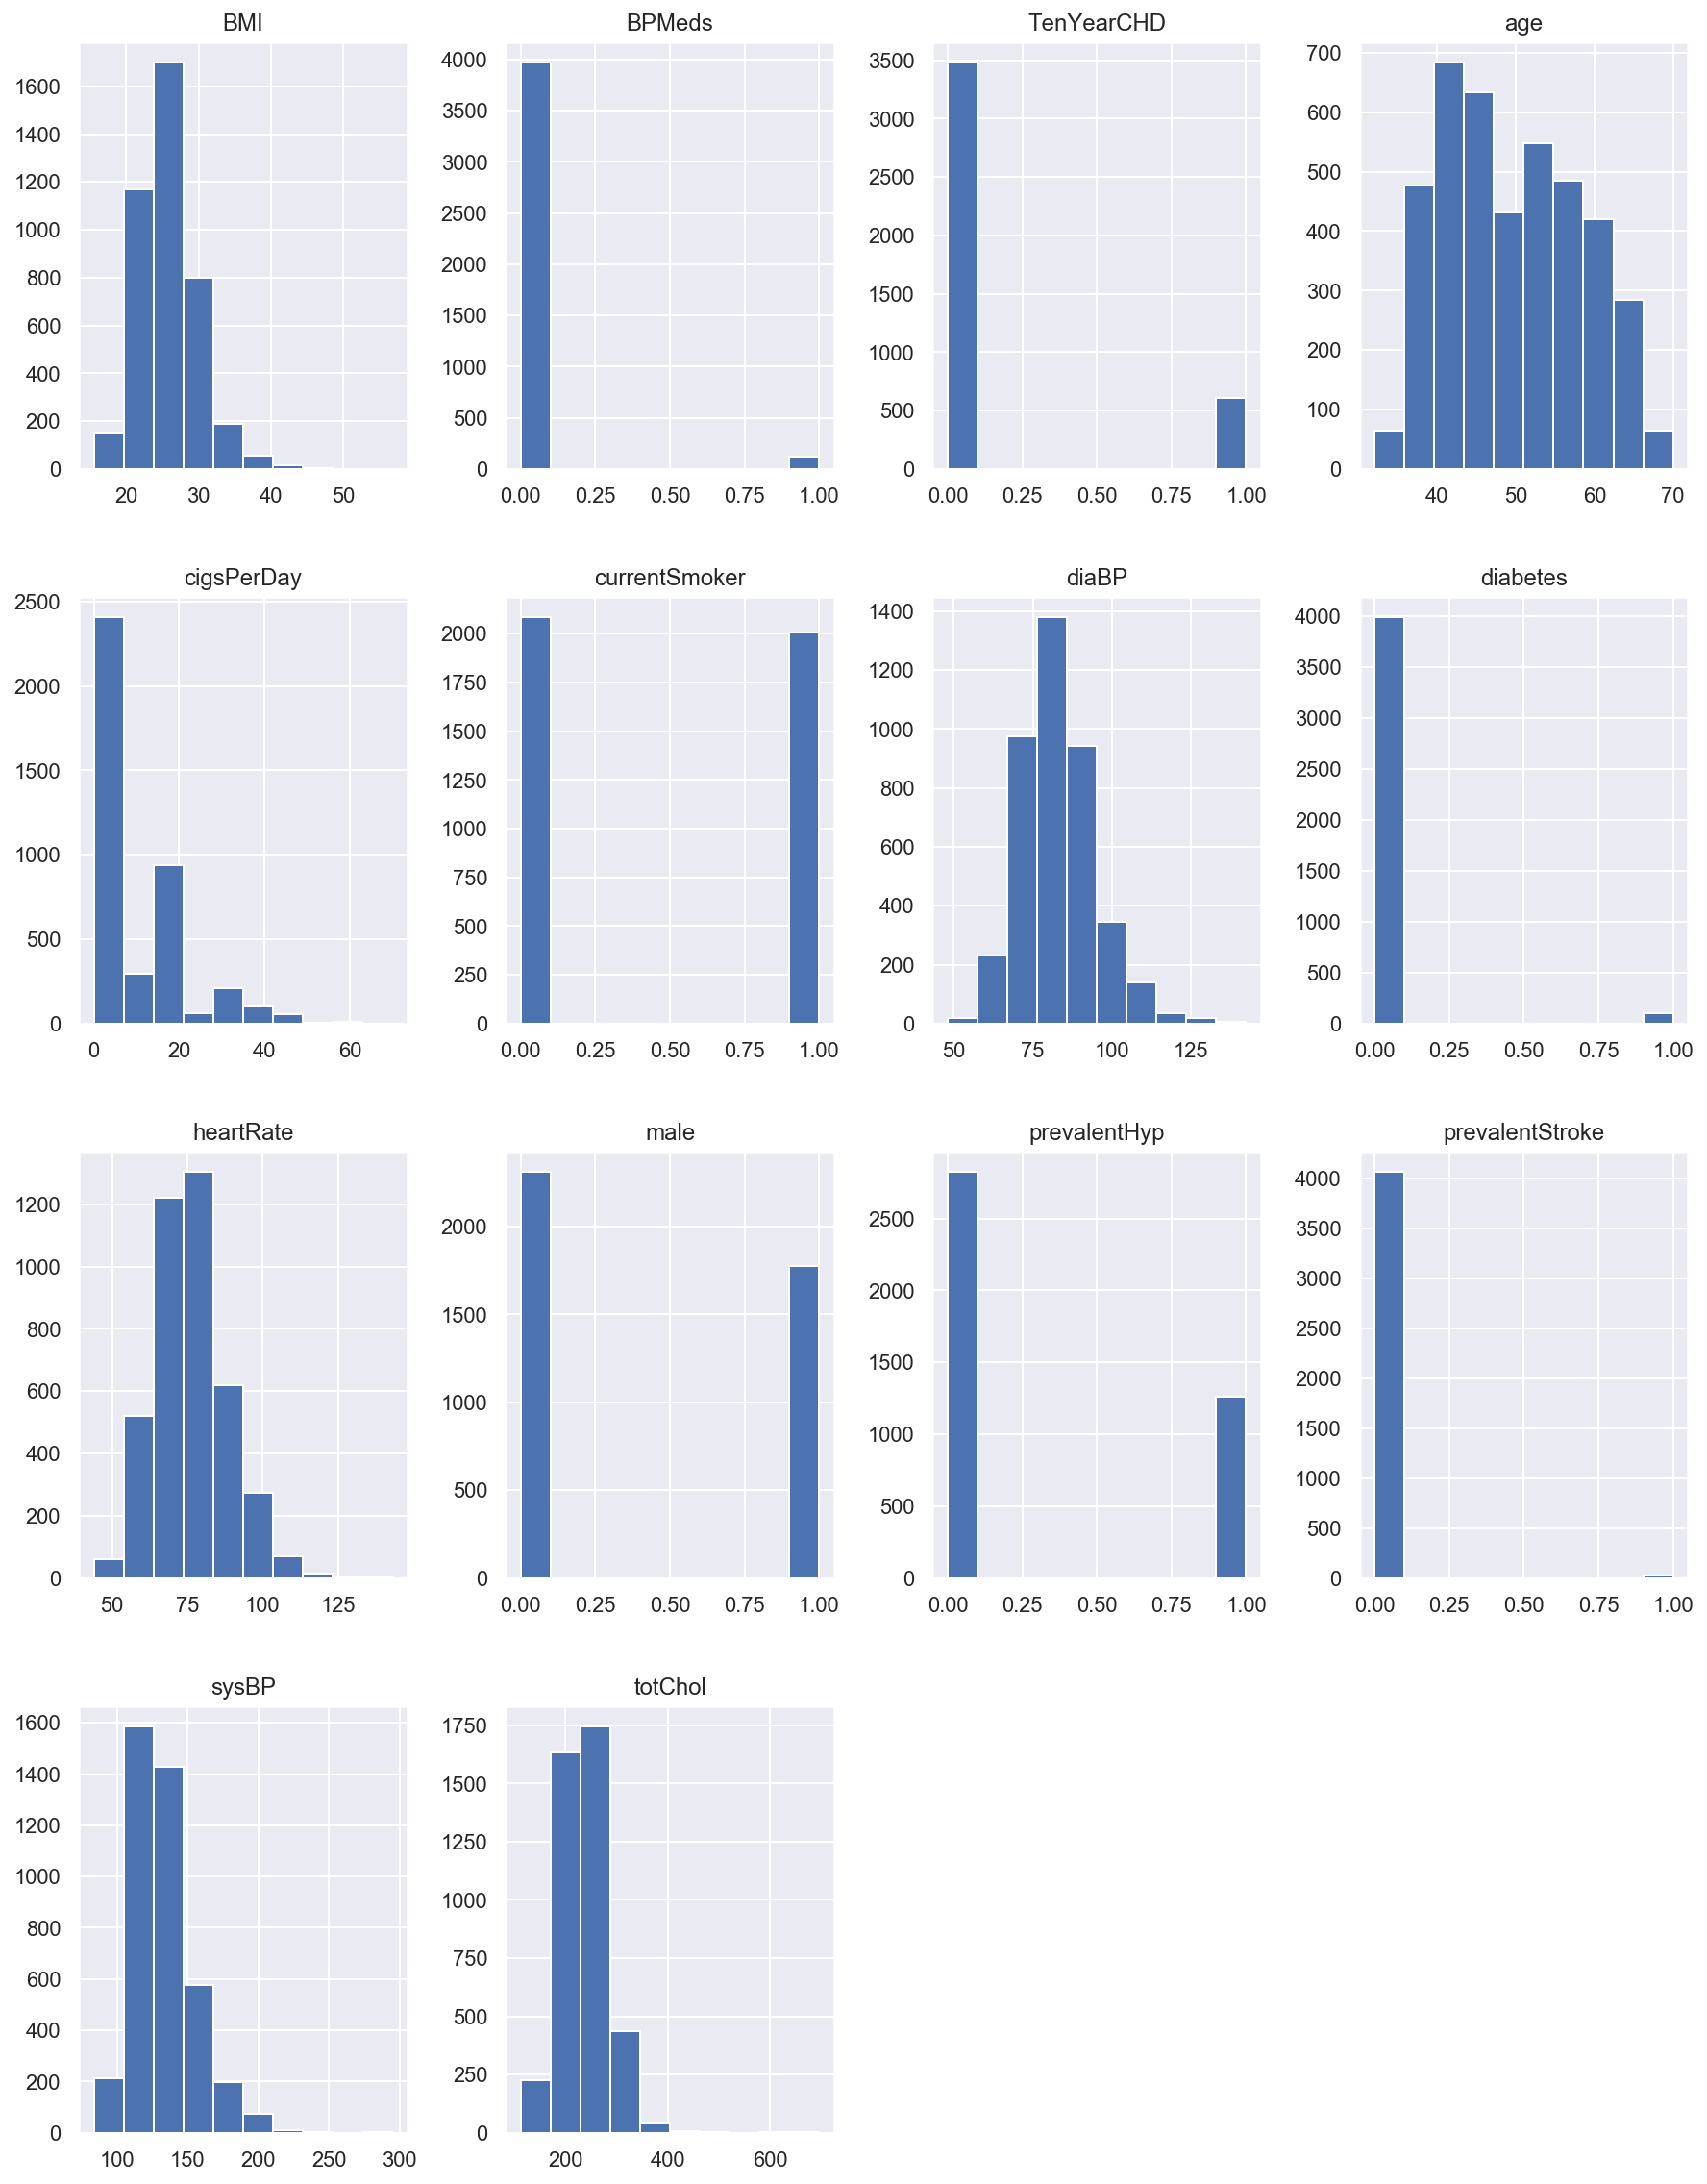

In [33]:
#create histograms for each column 
fig = plt.figure(figsize =(15,20))
ax=fig.gca()
df.hist(ax=ax)
plt.savefig('hists.pdf')

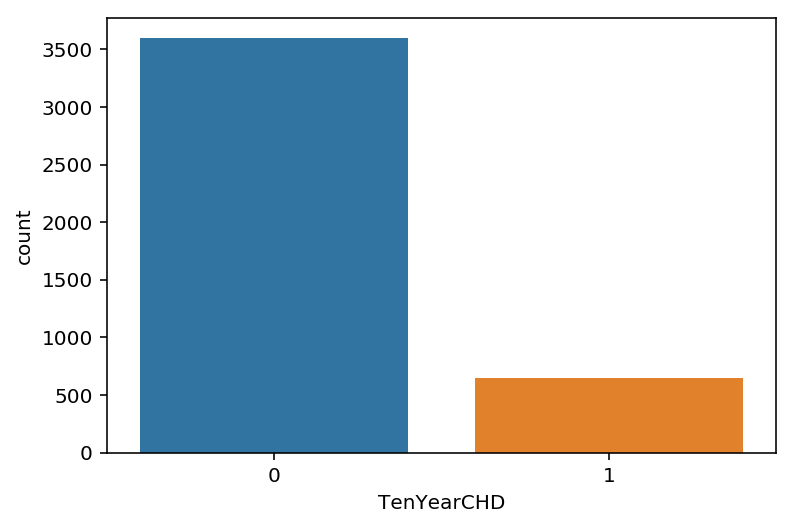

In [7]:
sns.countplot(df['TenYearCHD'])

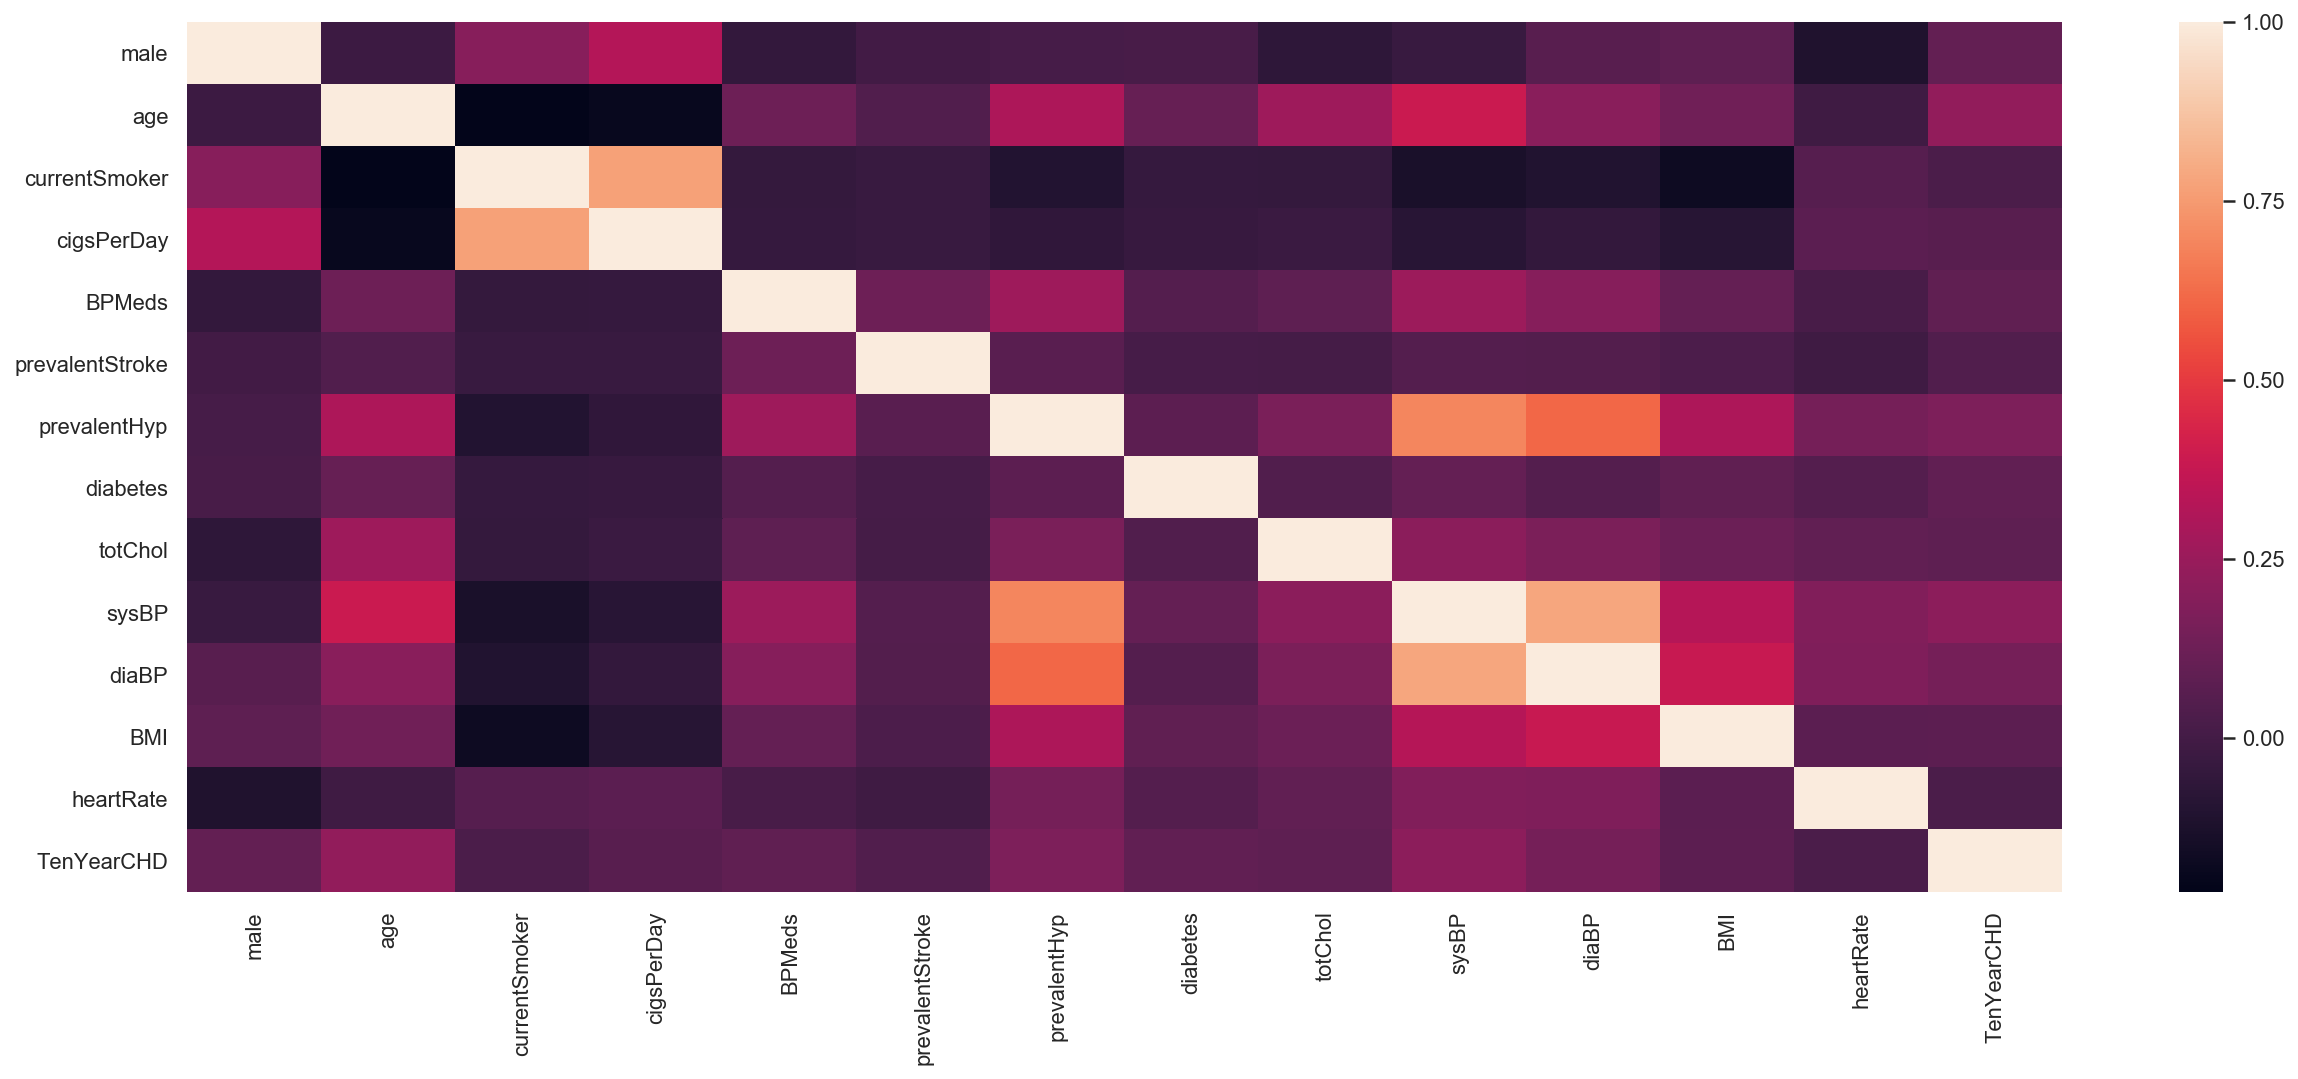

In [31]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.savefig('heat_map.pdf')

In [9]:
df= df.drop(['education', 'glucose'], axis=1)

In [10]:
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'TenYearCHD'],
      dtype='object')

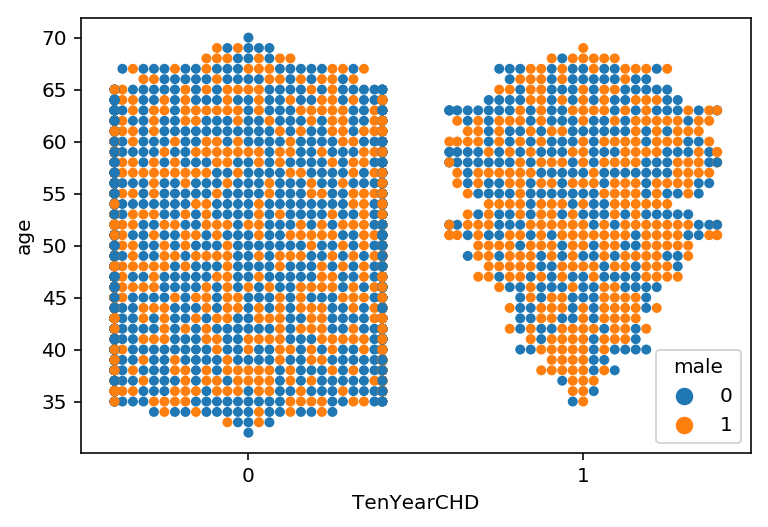

In [11]:

sns.swarmplot(x='TenYearCHD', y='age', hue='male', data=df)

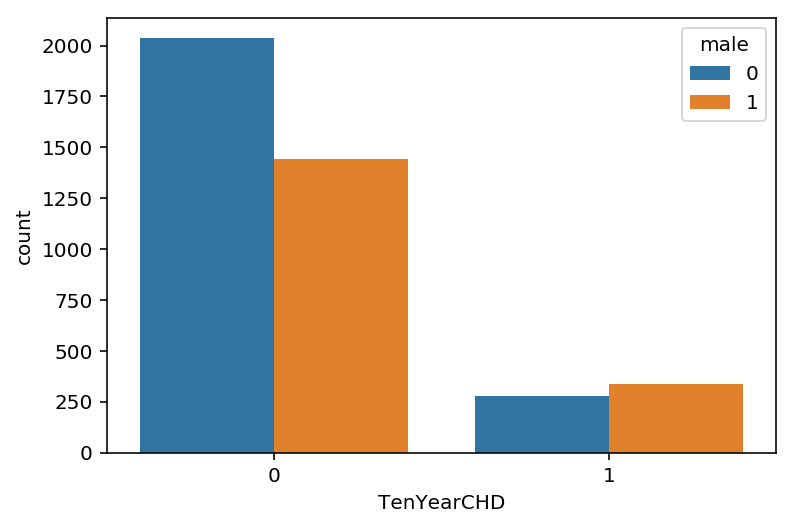

In [12]:
ax_2 = sns.countplot(x='TenYearCHD', hue='male', data=df)

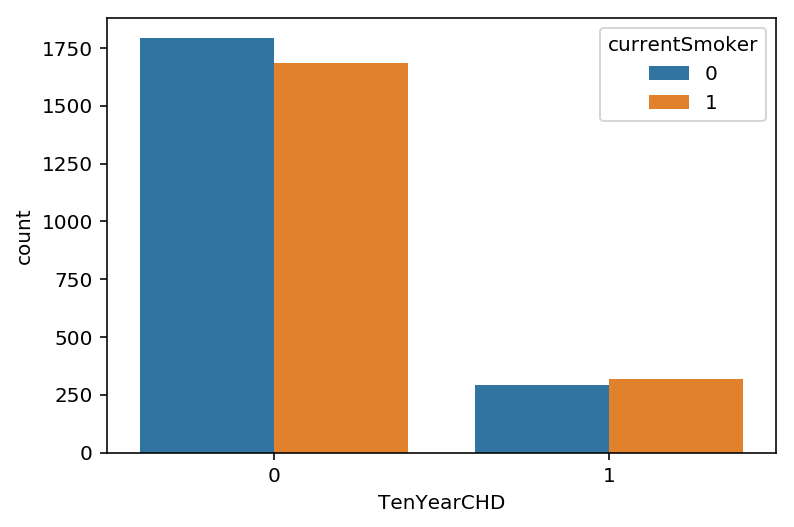

In [13]:
ax_3 = sns.countplot(x='TenYearCHD', hue='currentSmoker', data=df)

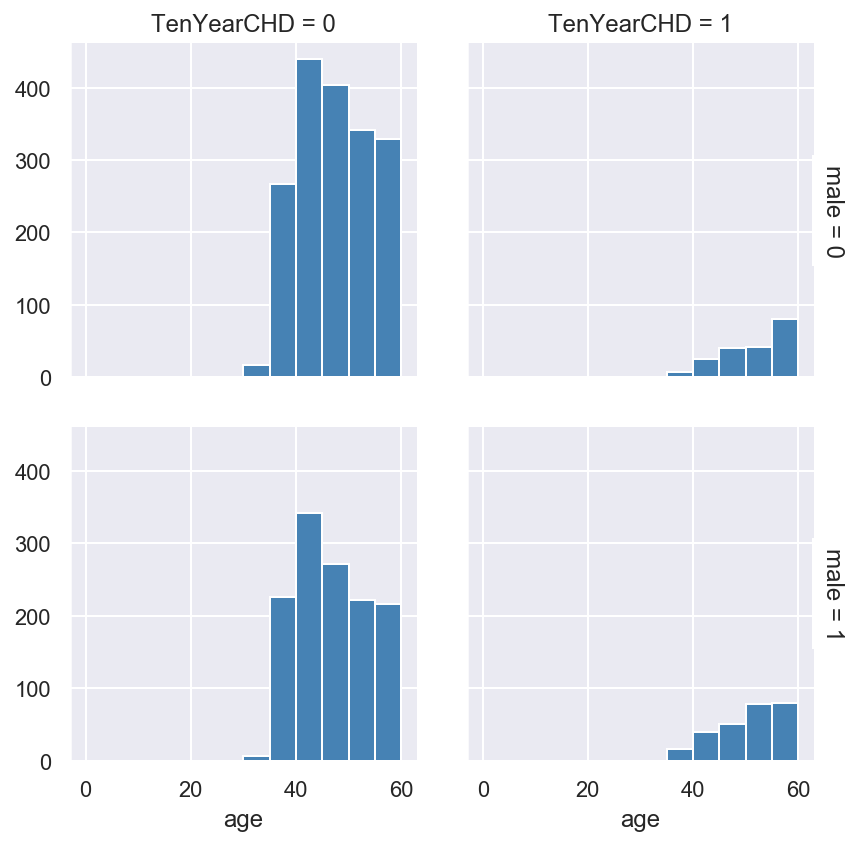

In [14]:
sns.set(style ='darkgrid')
g = sns.FacetGrid(df, row='male', col='TenYearCHD', margin_titles=True)
bins = np.linspace(0,60,13)
g.map(plt.hist, 'age', color='steelblue', bins=bins)

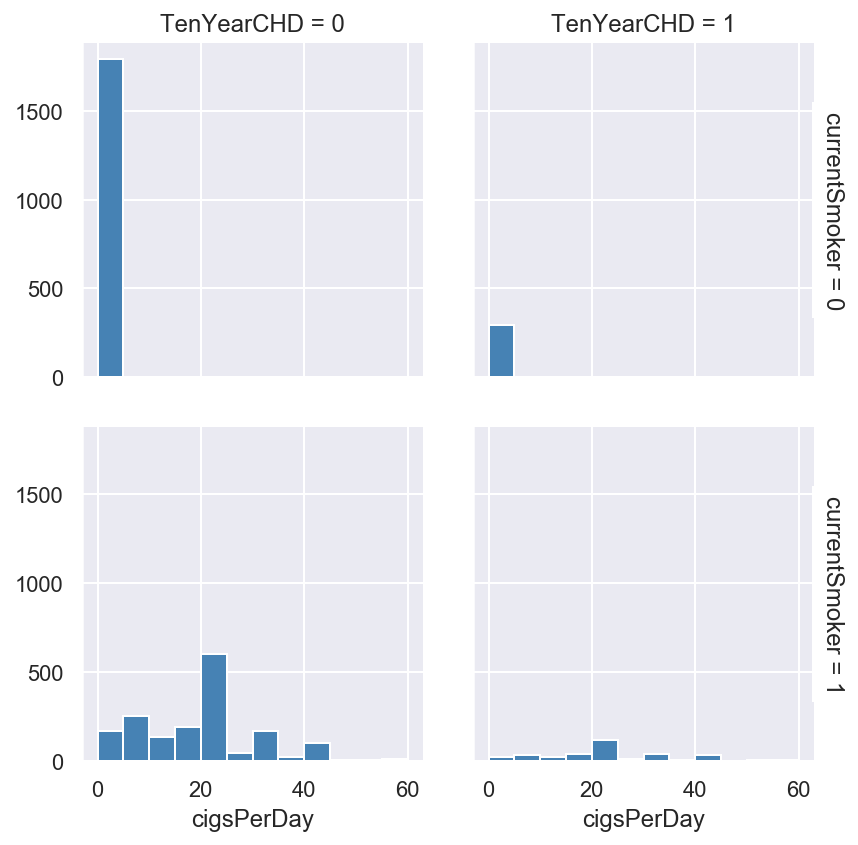

In [15]:
sns.set(style ='darkgrid')
g2 = sns.FacetGrid(df, row='currentSmoker', col='TenYearCHD', margin_titles=True)
bins = np.linspace(0,60,13)
g2.map(plt.hist, 'cigsPerDay', color='steelblue', bins=bins)

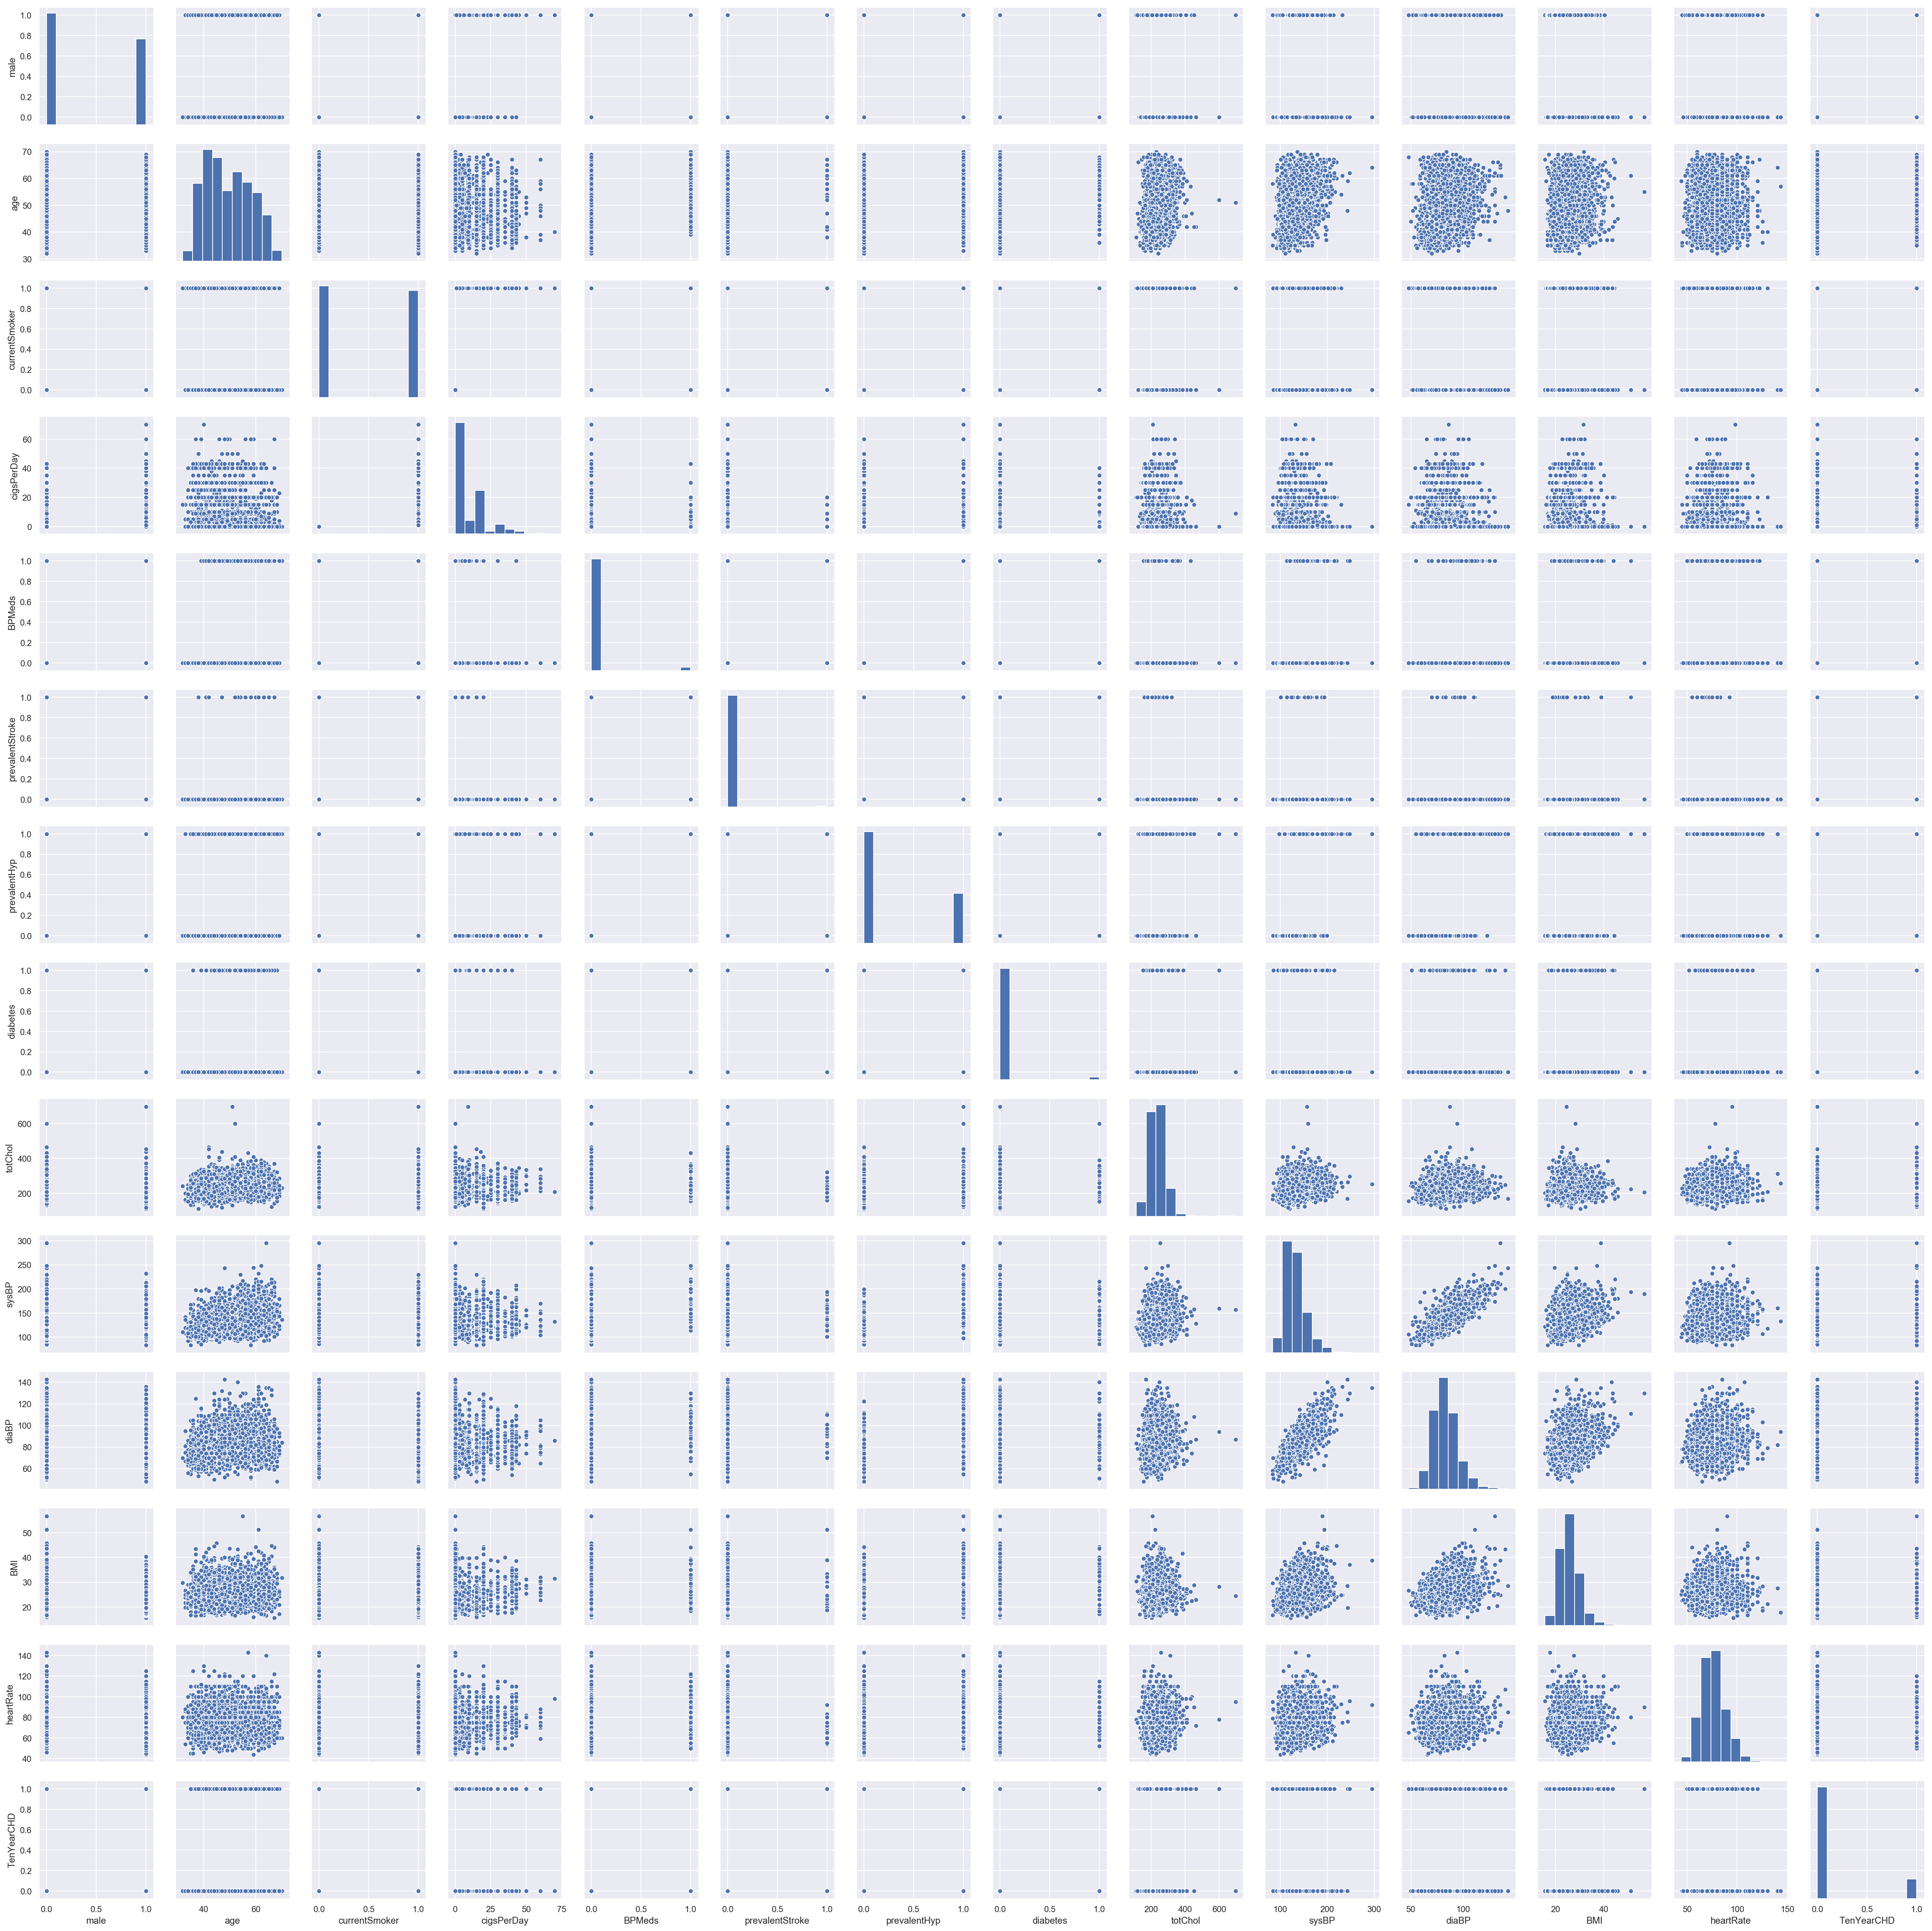

In [16]:
sns.pairplot(df)

Text(0.5,0,'Sex (1=male, 0=female)')

Text(0.5,1,'Demographic risk factors ')

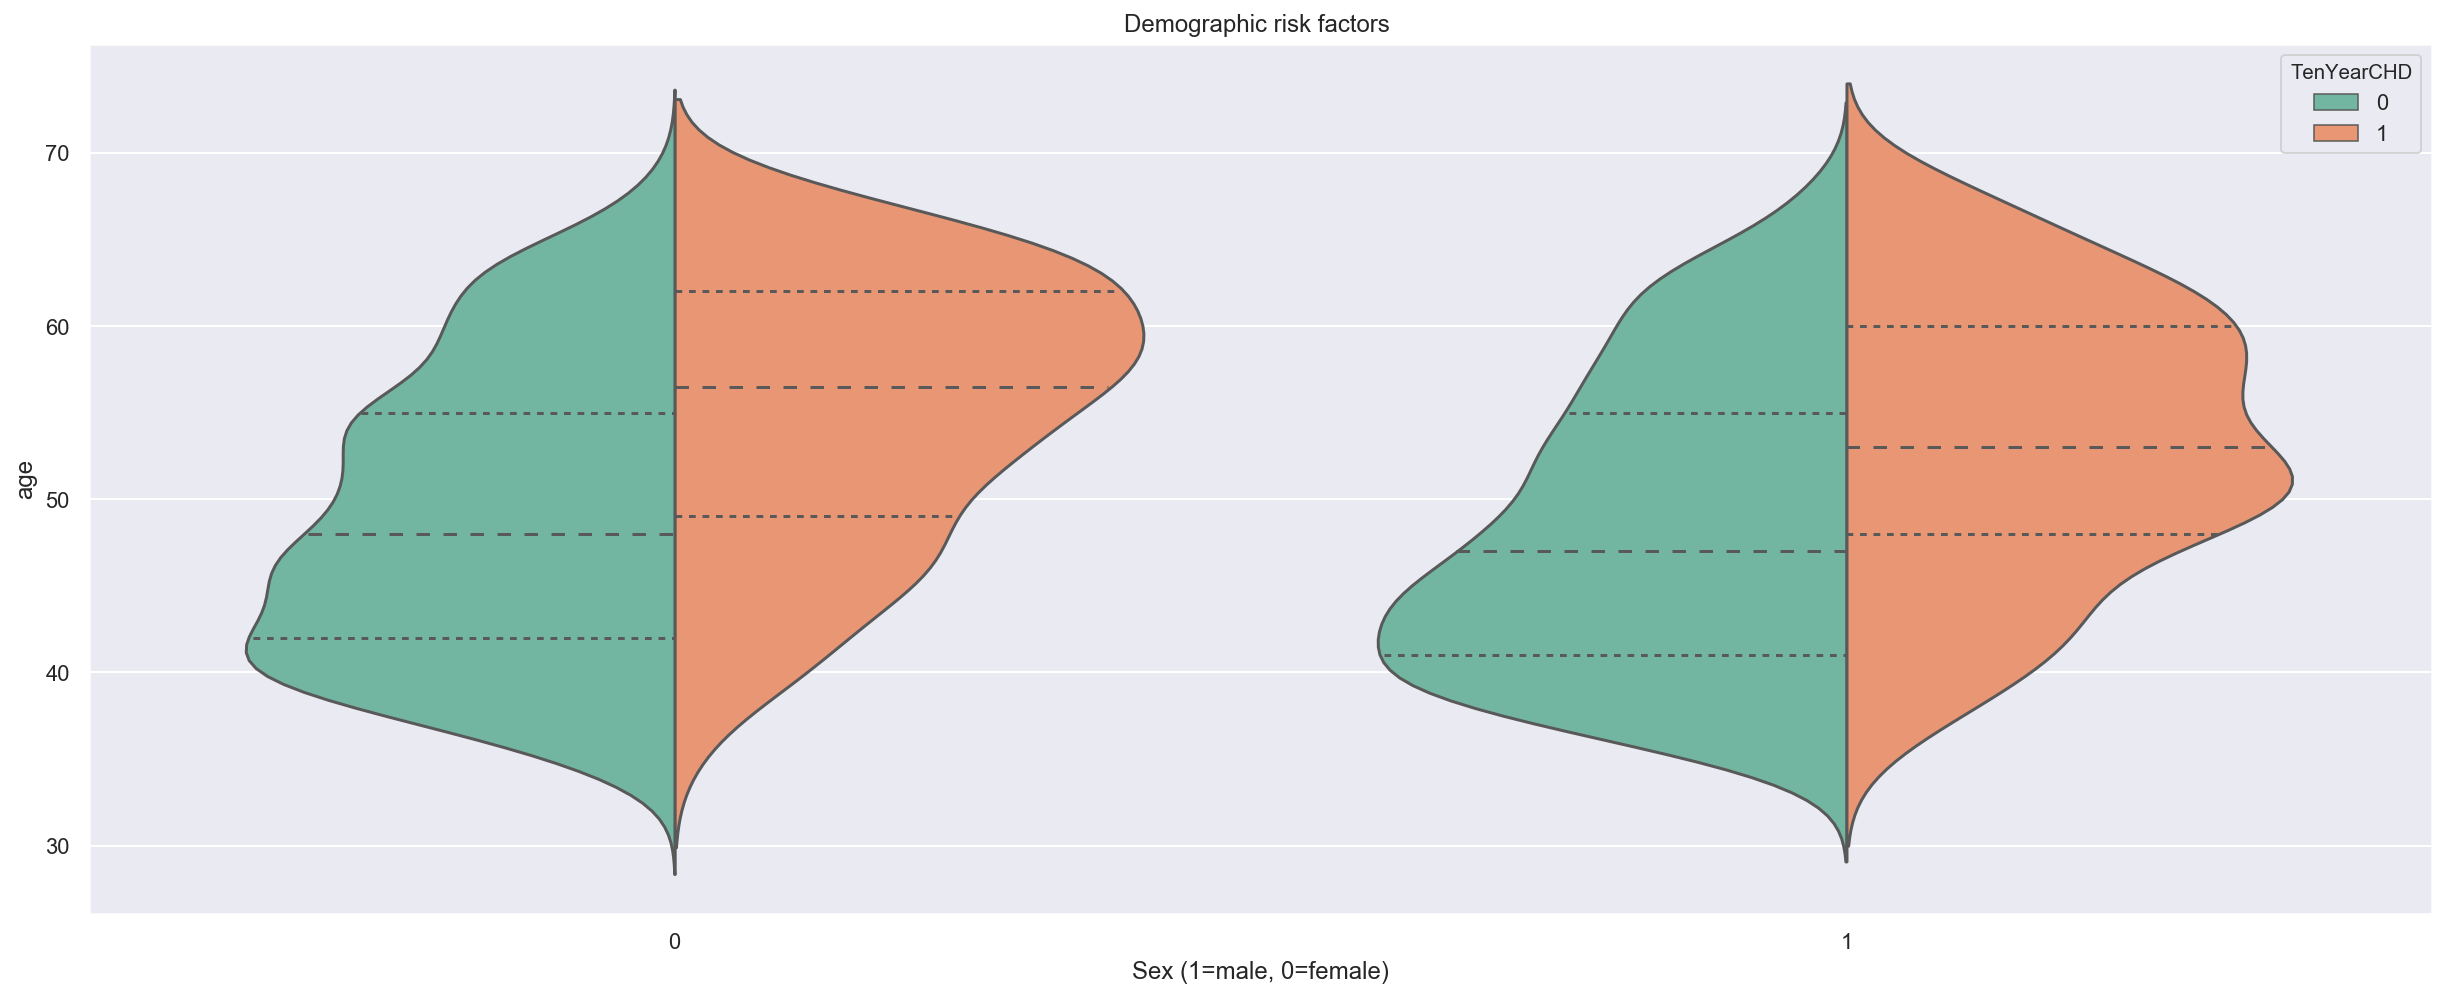

In [28]:
g = sns.violinplot(x='male', y='age', hue='TenYearCHD', split=True, inner='quart', data=df, palette='Set2')
plt.xlabel('Sex (1=male, 0=female)')
plt.title('Demographic risk factors ')
plt.savefig('demographic_risk.pdf')

In [18]:
#Current medical risk factors 



df1= df.drop(['male', 'age', 'diabetes', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'cigsPerDay', 'currentSmoker'], axis=1)


In [19]:

df1 = pd.melt(df1, 'TenYearCHD', var_name='meas')


Text(0.5,1,'Current medical risk factors')

Text(0,0.5,'Risk factor')

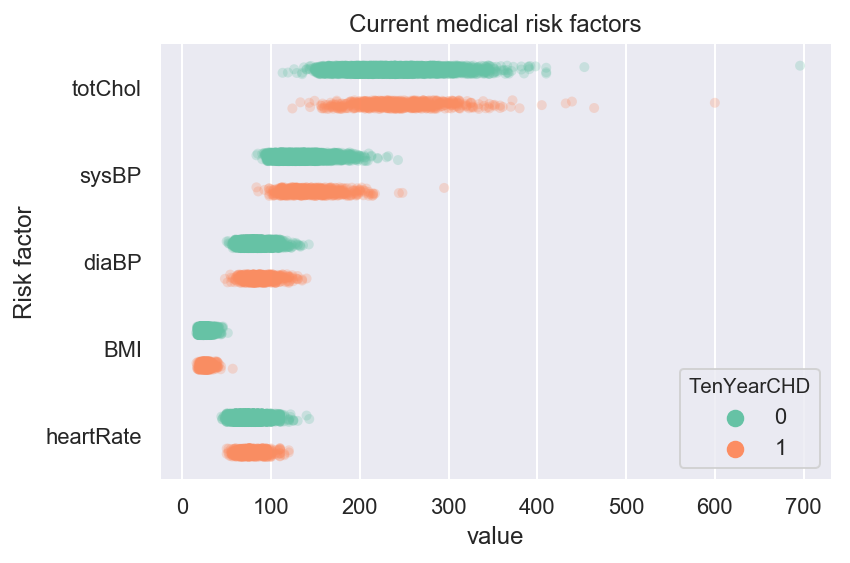

In [20]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x='value', y ='meas', hue='TenYearCHD', data=df1, dodge=True, jitter=True, alpha=.25, zorder=1, palette='Set2')

plt.title('Current medical risk factors')
plt.ylabel('Risk factor')

Text(0.5,1,'Current medical risk factors')

Text(0,0.5,'Risk factor')

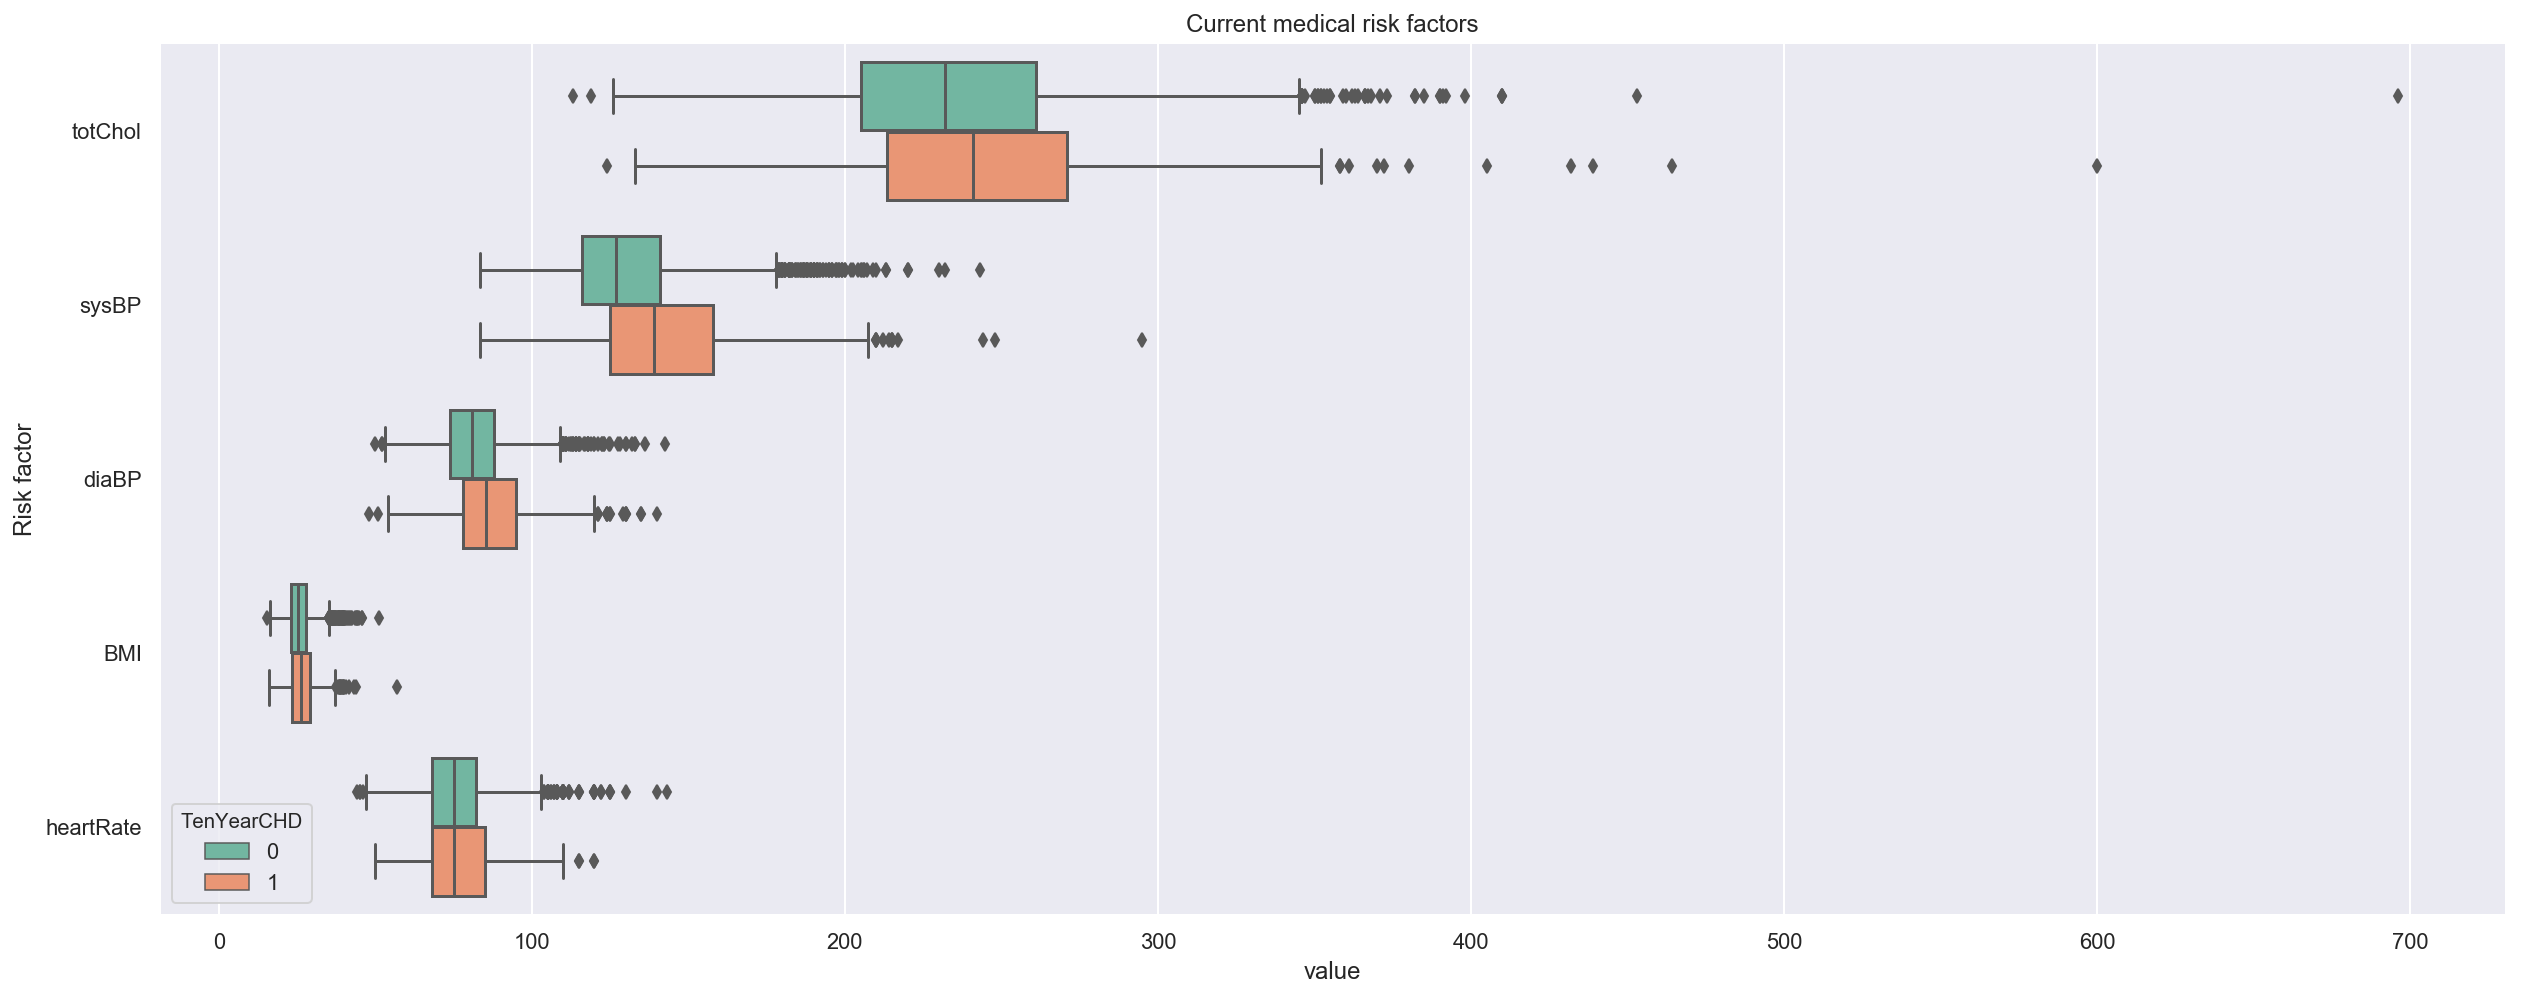

In [29]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.boxplot(x='value', y ='meas', hue='TenYearCHD', data=df1, palette='Set2')
plt.title('Current medical risk factors')
plt.ylabel('Risk factor')
plt.savefig('current_medical_risks.pdf')

In [22]:
#medical history risk factors 
df2 = df.drop(['male', 'age', 'cigsPerDay', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate'], axis=1)


In [23]:
df2= pd.melt(df2,'TenYearCHD', var_name='meas2' )

In [24]:
# Identify those features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs        Score
13    TenYearCHD  3477.000000
9          sysBP   685.163950
1            age   309.950260
3     cigsPerDay   256.404641
8        totChol   222.226347
10         diaBP   150.756040
6   prevalentHyp    85.309220
7       diabetes    31.650650
4         BPMeds    29.087085
0           male    21.324869
11           BMI    15.474582


In [25]:
featureScores = featureScores.sort_values(by='Score', ascending=False)

Text(0.5,1,'Feature importance')

Text(0.5,0,'Features')

Text(0,0.5,'Importance')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

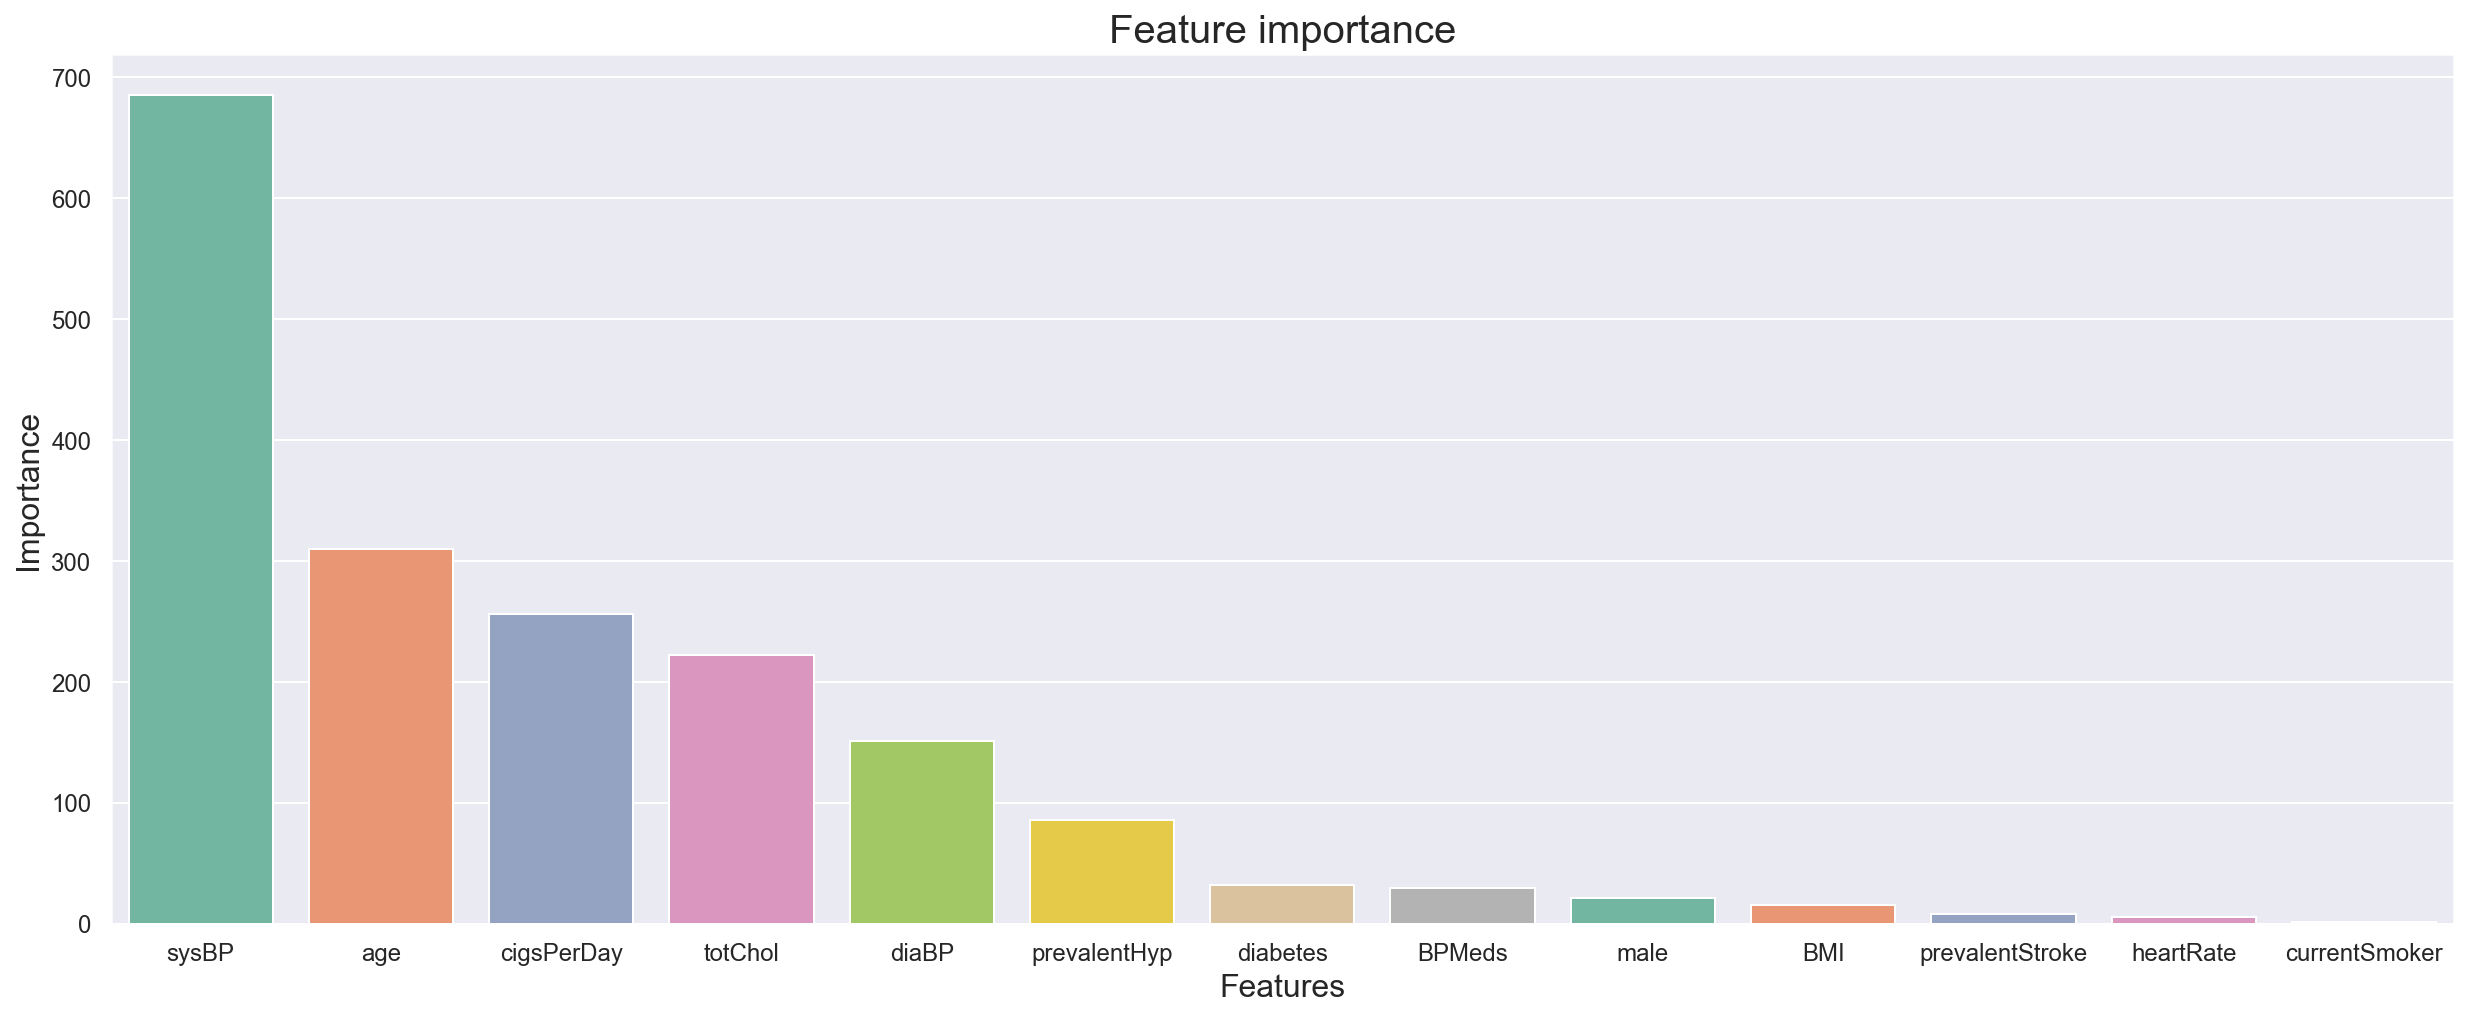

<Figure size 1512x576 with 0 Axes>

In [34]:
featureScores_feat = featureScores [1:]
sns.barplot(x='Specs', y='Score', data=featureScores_feat, palette ='Set2')
sns.set(rc={'figure.figsize':(21,8)})


plt.title('Feature importance', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.savefig('feature_importance.pdf')